In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from glob import glob
# 한글 폰트
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [23]:
# 1) 데이터 로드
# 1. 리스트 선언 후 다운받은 데이터 pcb1~pcb4의 csv 파일 불러오기
pcb_list = []
for i in range(1, 5):
    add_df = pd.read_csv(f'Data/pcb{i}/image_anno.csv')
    pcb_list.append(add_df)
df = pd.concat(pcb_list, ignore_index=True)
df = df.drop('mask', axis=1)
df

,image,label
0,pcb1/Data/Images/Normal/0000.JPG,normal
1,pcb1/Data/Images/Normal/0001.JPG,normal
2,pcb1/Data/Images/Normal/0002.JPG,normal
3,pcb1/Data/Images/Normal/0003.JPG,normal
4,pcb1/Data/Images/Normal/0004.JPG,normal
...,...,...
799,pcb4/Data/Images/Anomaly/095.JPG,"wrong place,dirt"
800,pcb4/Data/Images/Anomaly/096.JPG,wrong place
801,pcb4/Data/Images/Anomaly/097.JPG,"wrong place,dirt"
802,pcb4/Data/Images/Anomaly/098.JPG,"wrong place,dirt"


In [24]:
# 2) 완성된 데이터 프레임을 배열 형태로 전처리
images = [] # 1. 이미지를 담을 빈 리스트 생성

for i in df.image:
    img_path = f'Data/{i}'
    img = image.load_img(img_path, target_size=(128, 128)) # 128x128 사이즈로 로드
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0 # 정규화
    
# 2. 빈 리스트에 담기
    images.append(img_array)

# 3. 배열로 변환
img_array = np.array(images)

In [25]:
# 3) 이진 분류 모델을 만들기 위해 라벨을 정상이면 0, 아니면 1로 바꿔준다
df.label = df.label.apply(lambda x : 0 if x == 'normal' else 1)

In [26]:
# 4) train과 test 설정
X_train, X_test, y_train, y_test = train_test_split(img_array, df.label, test_size=0.2, random_state=42)

In [27]:
# 5) CNN 모델 설계
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation="relu", input_shape = (128, 128, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")]
)

c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


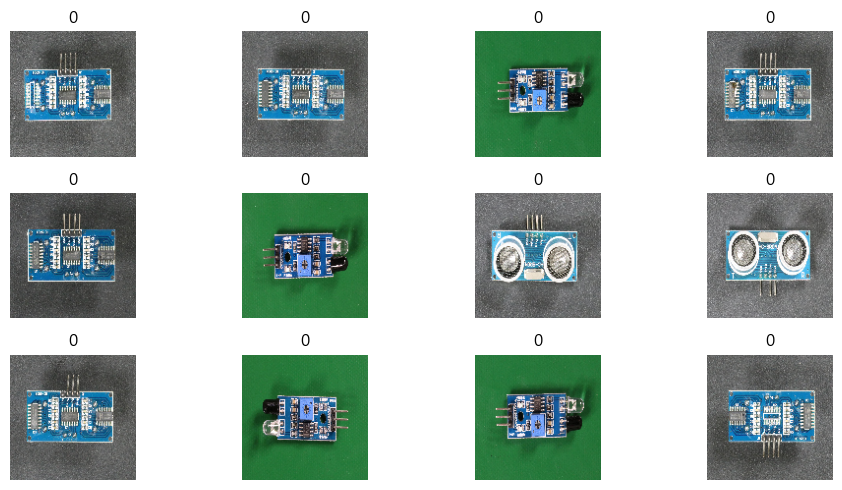

In [28]:
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i])
    plt.title(df.label[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [35]:
# 6) 모델 학습
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9256 - loss: 0.1876 - val_accuracy: 0.8462 - val_loss: 0.4047
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.9308 - loss: 0.1568 - val_accuracy: 0.7231 - val_loss: 0.5086
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9412 - loss: 0.1573 - val_accuracy: 0.9077 - val_loss: 0.3474
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9654 - loss: 0.1113 - val_accuracy: 0.8308 - val_loss: 0.4277
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9706 - loss: 0.0922 - val_accuracy: 0.7846 - val_loss: 0.5379
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9550 - loss: 0.1106 - val_accuracy: 0.8154 - val_loss: 0.3978
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9775 - loss: 0.0822 - val_accuracy: 0.7846 - val_loss: 0.5651
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9689 - loss: 0.0773 - val_accuracy: 0.

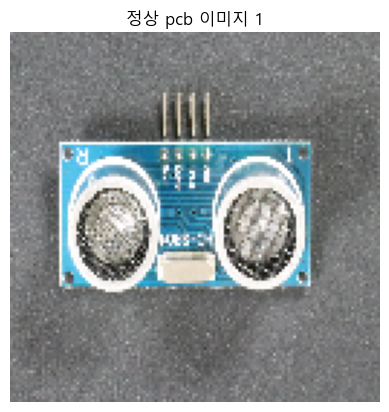

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
예측 결과 : 정상
신뢰도: 99.84%


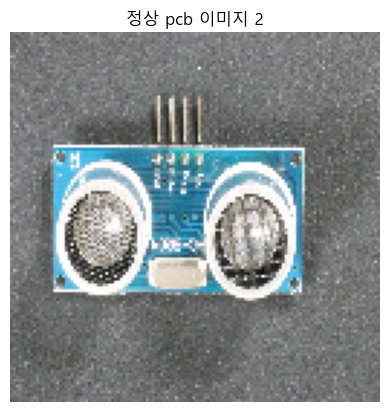

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
예측 결과 : 정상
신뢰도: 99.93%


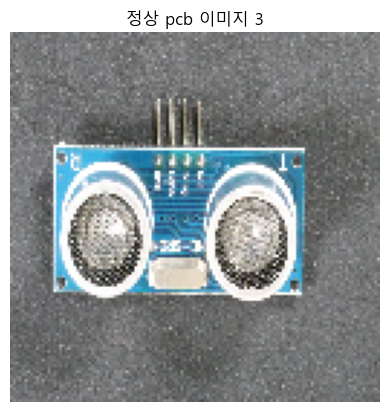

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
예측 결과 : 정상
신뢰도: 99.94%


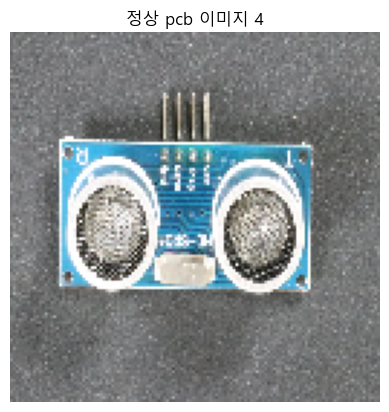

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
예측 결과 : 정상
신뢰도: 99.96%


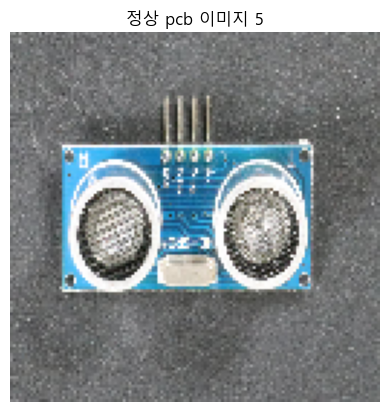

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
예측 결과 : 정상
신뢰도: 99.81%


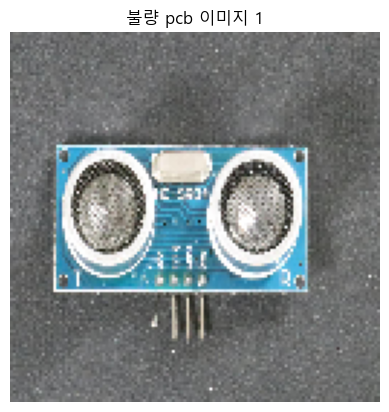

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
예측 결과 : 불량
신뢰도: 99.79%


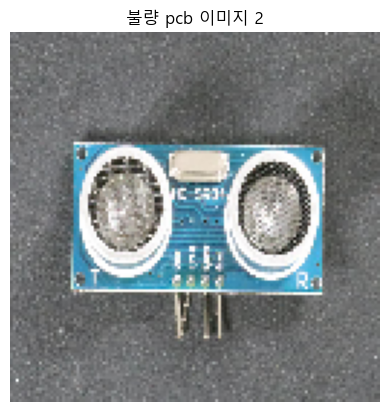

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
예측 결과 : 불량
신뢰도: 99.96%


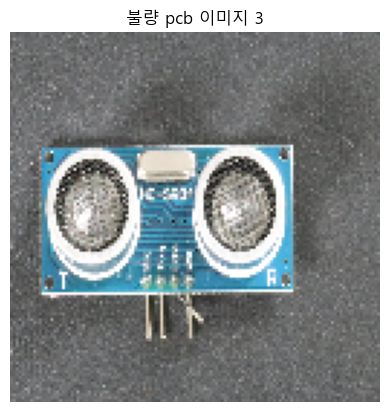

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
예측 결과 : 불량
신뢰도: 99.98%


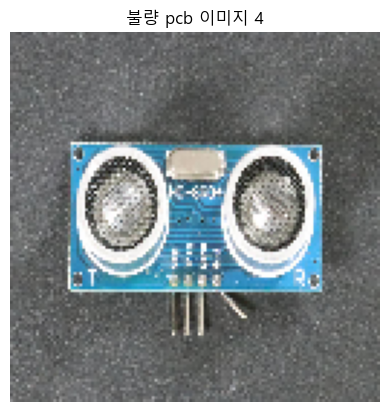

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
예측 결과 : 불량
신뢰도: 99.95%


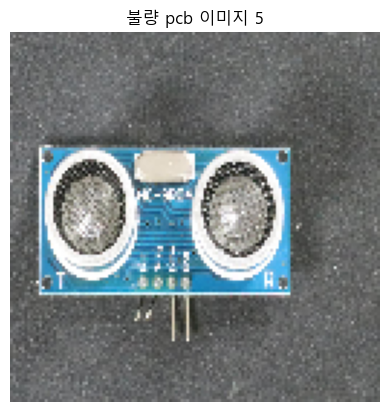

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
예측 결과 : 불량
신뢰도: 100.00%


In [33]:
# 7) 이미지 입력 및 확인

# 정상 이미지 5개
for i in range(0,5):
    img_path = f'Data/pcb1/Data/Images/Normal/000{i}.JPG'
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    plt.imshow(img_array[0])
    plt.axis("off")
    plt.title(f"정상 pcb 이미지 {i+1}")
    plt.show()

    # 예측 (결과는 0~1 사이의 확률값)
    pred = model.predict(img_array) 
    
    # 이진 분류
    probability = pred[0][0]
    
    if probability > 0.5:
        result = '불량'
        confidence = probability * 100
    else:
        result = '정상'
        confidence = (1 - probability) * 100

    print(f"예측 결과 : {result}")
    print(f"신뢰도: {confidence:.2f}%")

# 불량 이미지 5개
for i in range(0,5):
    img_path = f'Data/pcb1/Data/Images/Anomaly/00{i}.JPG'
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    plt.imshow(img_array[0])
    plt.axis("off")
    plt.title(f"불량 pcb 이미지 {i+1}")
    plt.show()

    # 예측 (결과는 0~1 사이의 확률값)
    pred = model.predict(img_array) 
    
    # 이진 분류
    probability = pred[0][0]
    
    if probability > 0.5:
        result = '불량'
        confidence = probability * 100
    else:
        result = '정상'
        confidence = (1 - probability) * 100

    print(f"예측 결과 : {result}")
    print(f"신뢰도: {confidence:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[67  9]
 [11 74]]
              precision    recall  f1-score   support

   Normal(0)       0.86      0.88      0.87        76
 Abnormal(1)       0.89      0.87      0.88        85

    accuracy                           0.88       161
   macro avg       0.88      0.88      0.88       161
weighted avg       0.88      0.88      0.88       161



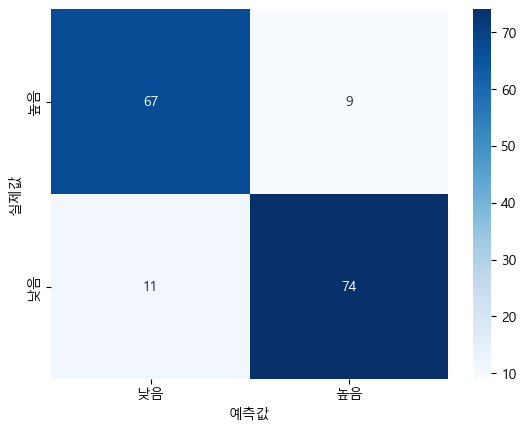

In [36]:
# 8) 모델 평가 및 시각화

# 1. Confusion Matrix

y_pred = model.predict(X_test)
y_pred_labels = (y_pred.flatten() > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

print(classification_report(y_test, y_pred_labels, target_names=['Normal(0)', 'Abnormal(1)']))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['낮음', '높음'],
            yticklabels=['높음', '낮음'])
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

In [ ]:
# 2. mae, mse, rmse
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"mae : {mae:.4f}\nmse : {mse:.4f}\nrmse : {rmse:.4f}")
# 수치가 너무 낮아 찾아본 결과, 이진 분류 모델이기 때문
# f1 score 혹은 confusion matrix에 중요성을 놓으면 될 것 같다.

mae : 0.1395
mse : 0.1129
rmse : 0.3360
